# Синтетический Набор данных для прогнозирования Возраста человека

**О наборе данных**

***Задача:***

Название: набор данных для прогнозирования возраста Прогнозирование возраста (регрессия)

Описание:

Этот набор данных содержит синтетические данные, предназначенные для прогнозирования возраста на основе различных факторов, связанных со здоровьем и образом жизни. Он включает 3000 строк с 24 характеристиками, каждая из которых представляет различные аспекты физического здоровья и образа жизни.

**Характеристики:**

Рост (см): рост человека в сантиметрах.

Вес (кг): вес человека в килограммах.

Артериальное давление (с/д): артериальное давление (систолическое/диастолическое) в мм рт. ст.

Уровень холестерина (мг/дл): уровень холестерина в миллиграммах на децилитр.

ИМТ: Индекс массы тела, рассчитываемый исходя из роста и веса.

Уровень глюкозы в крови (мг/дл): уровень глюкозы в крови в миллиграммах на децилитр.

Плотность костной ткани (г/см²): плотность костной ткани в граммах на квадратный сантиметр.

Острота зрения: острота зрения по шкале от 0 (размытое) до 100 (идеальное).

Способность слышать (дБ): способность слышать в децибелах.

Уровень физической активности: классифицируется как «низкий», «умеренный» или «высокий».

Статус курения: категориальные значения, включая «никогда», «бывший» и «текущий».

Потребление алкоголя: Частота употребления алкоголя.

Диета: тип диеты, классифицируемый как «сбалансированная», «с высоким содержанием белка», «с низким содержанием углеводов» и т. д.

Хронические заболевания: наличие хронических заболеваний (например, диабет, гипертония).

Использование лекарств: Использование лекарств.

Семейный анамнез: Наличие в семейном анамнезе возрастных заболеваний.

Когнитивная функция: самооценка когнитивной функции по шкале от 0 (плохо) до 100 (отлично).

Состояние психического здоровья: самооценка состояния психического здоровья по шкале от 0 (плохое) до 100 (отличное).

Режим сна: Среднее количество часов сна за ночь.

Уровень стресса: субъективная оценка уровня стресса по шкале от 0 (низкий) до 100 (высокий).

Воздействие загрязнения: Воздействие загрязнения, измеряемое в произвольных единицах.

Пребывание на солнце: Среднее время пребывания на солнце в часах в неделю.

Уровень образования: Наивысший достигнутый уровень образования.

Уровень дохода: Годовой доход в долларах США.

Возраст (лет): целевая переменная, представляющая возраст человека.


**Варианты использования:**
Идеально подходит для моделей машинного обучения, предназначенных для прогнозирования возраста на основе факторов, связанных со здоровьем и образом жизни. Подходит для изучения взаимосвязи между показателями здоровья и возрастом.


[Ссылка на датасет](https://www.kaggle.com/datasets/abdullah0a/human-age-prediction-synthetic-dataset)


ЭТАП 1: Изучить набор данных, исследовать на пропуске, выбросы, балансировку по классам и тд

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Количество пропусков:
Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64
===== МОДЕЛЬ ДО ВЫБРОСОВ ====

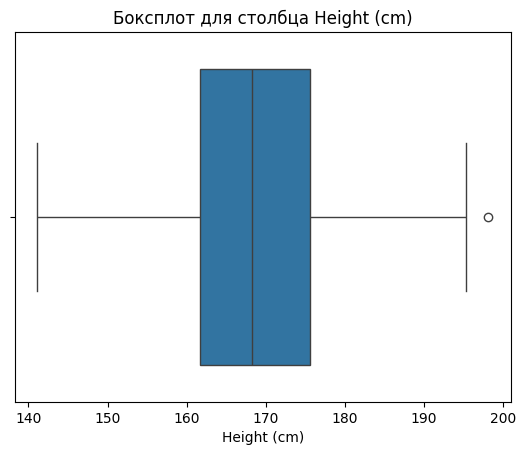

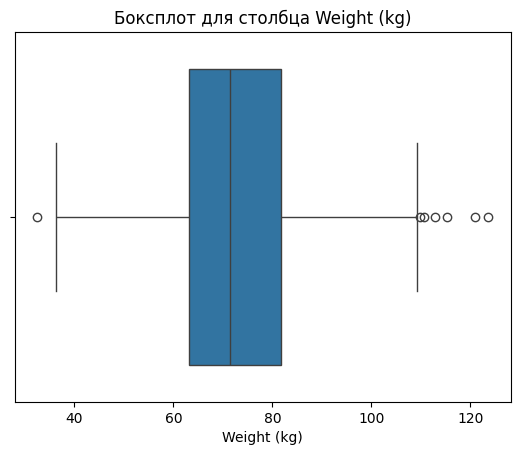

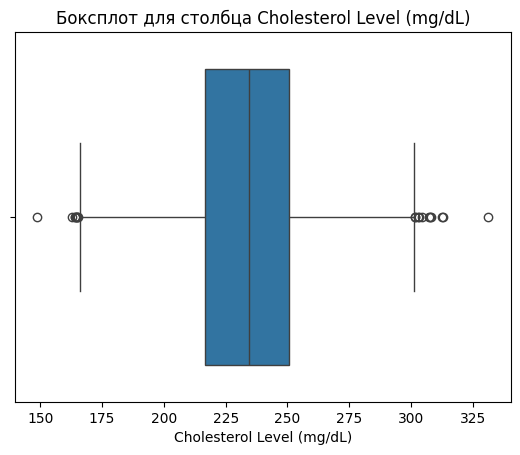

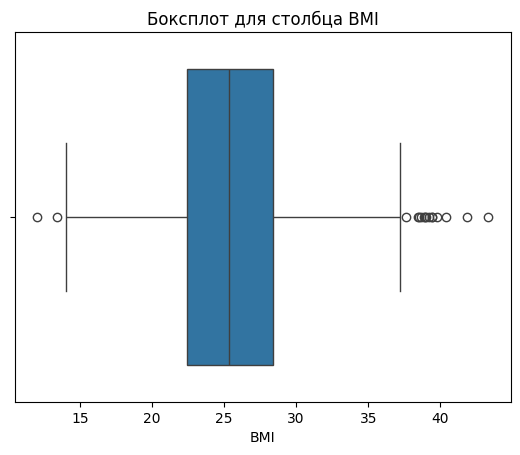

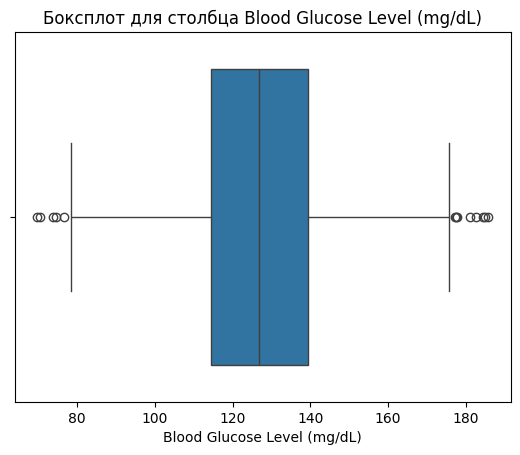

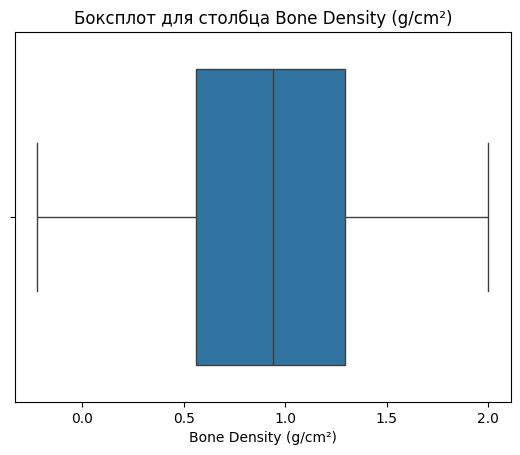

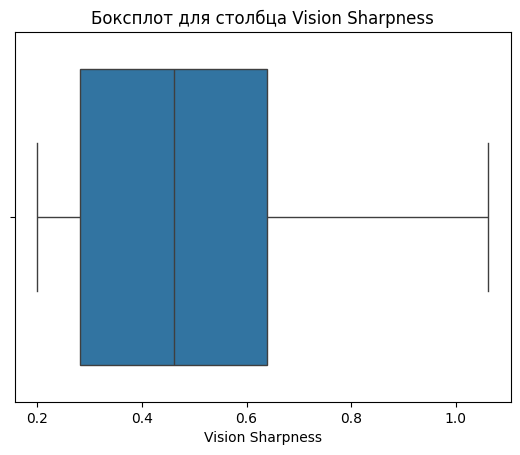

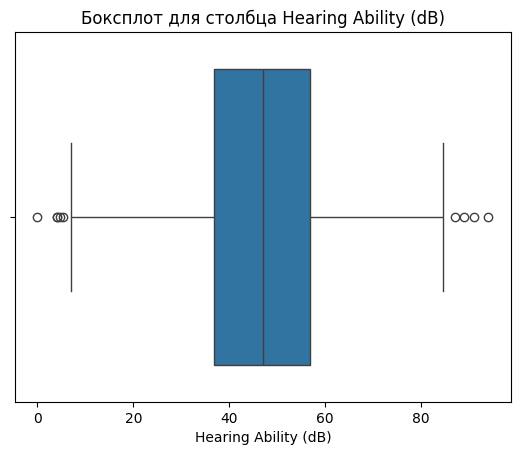

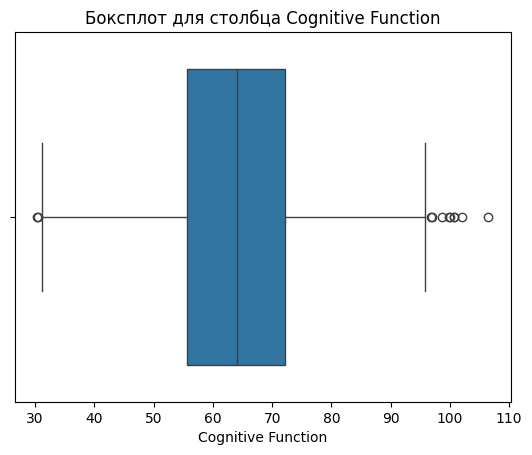

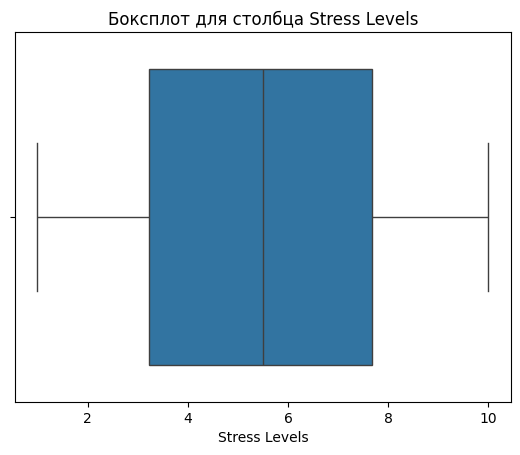

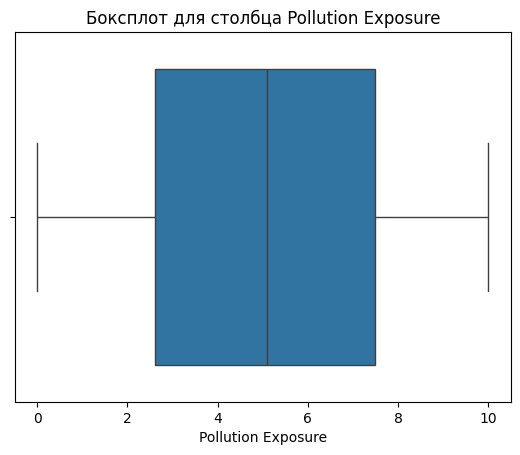

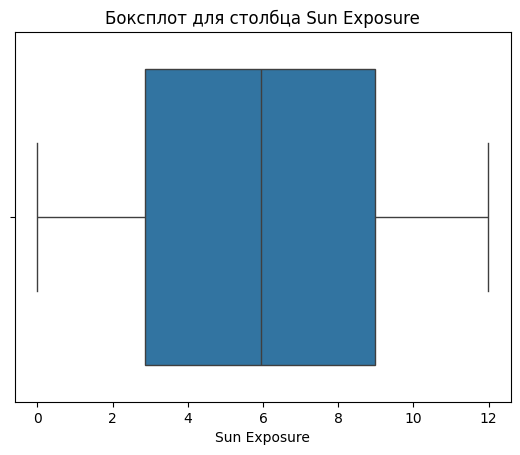

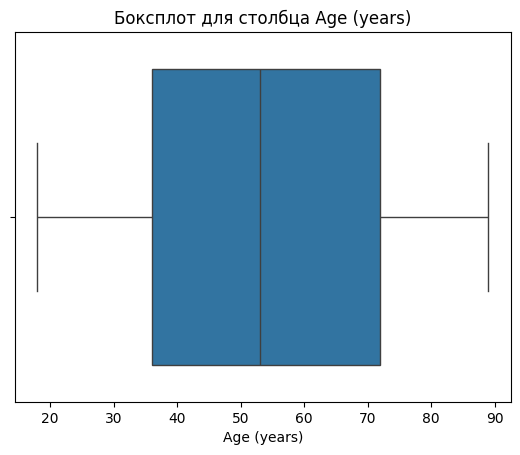

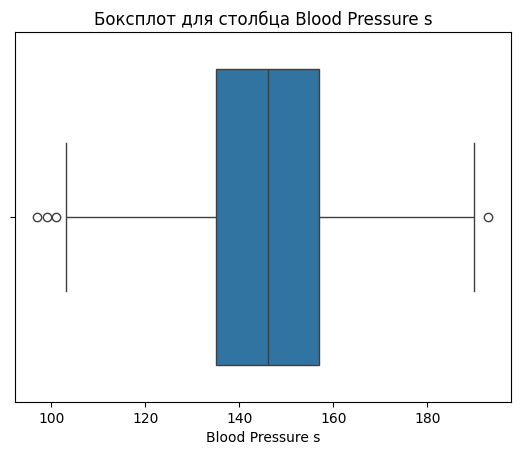

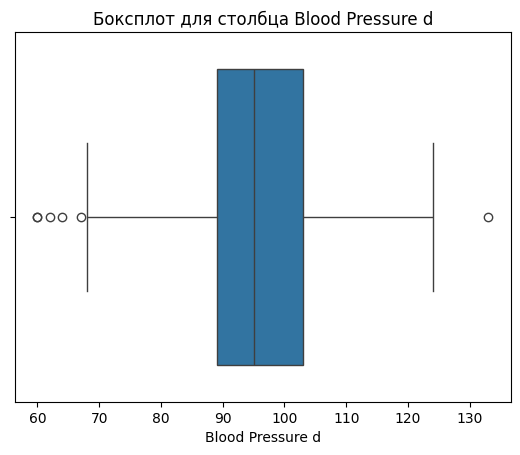

      Gender  Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  \
0       Male   171.148359    86.185197                 259.465814  29.423017   
1       Male   172.946206    79.641937                 263.630292  26.626847   
2     Female   155.945488    49.167058                 207.846206  20.217553   
3     Female   169.078298    56.017921                 253.283779  19.595270   
4     Female   163.758355    73.966304                 236.119899  27.582078   
...      ...          ...          ...                        ...        ...   
2995    Male   161.632502    88.323405                 204.175510  33.807917   
2996    Male   163.443512    93.217007                 197.384424  34.894725   
2997    Male   177.857644    86.258847                 238.641542  27.268332   
2998  Female   162.287164    41.371018                 198.244328  15.708252   
2999    Male   175.341710    78.718038                 279.118184  25.603762   

      Blood Glucose Level (mg/dL)  Bone

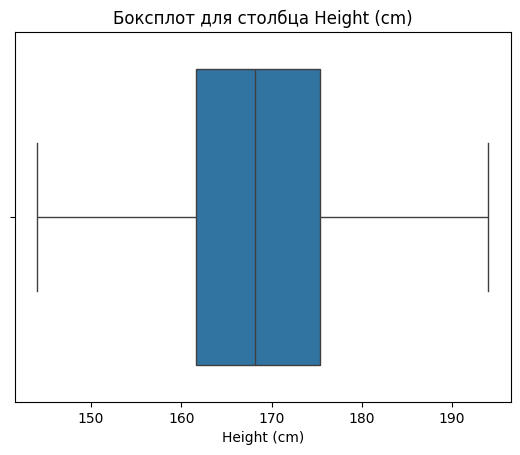

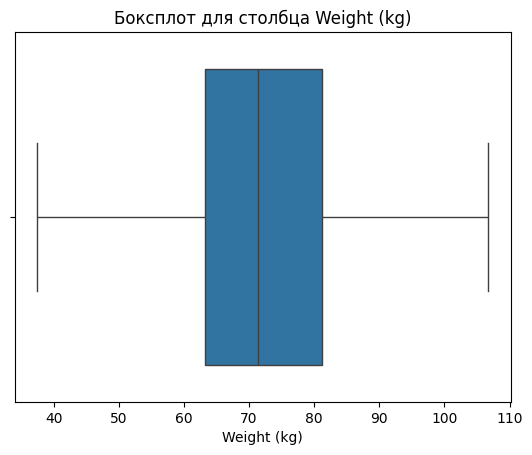

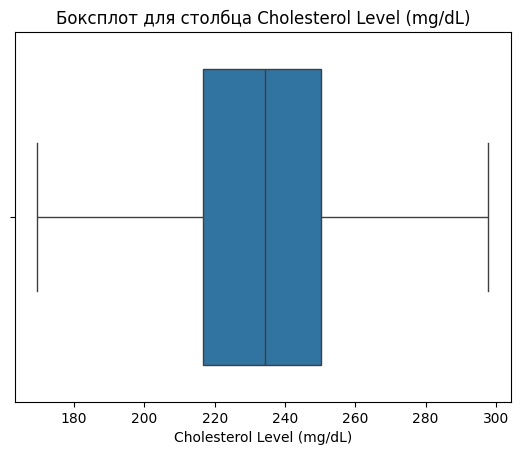

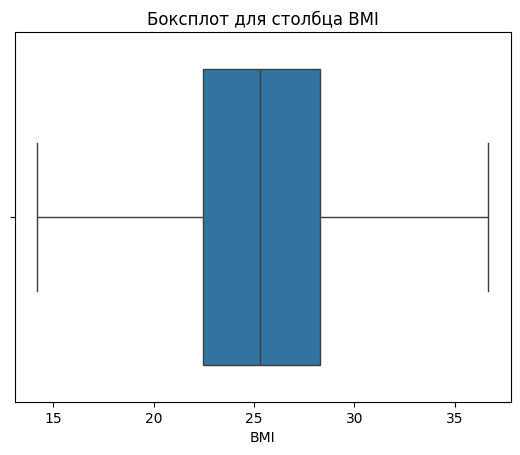

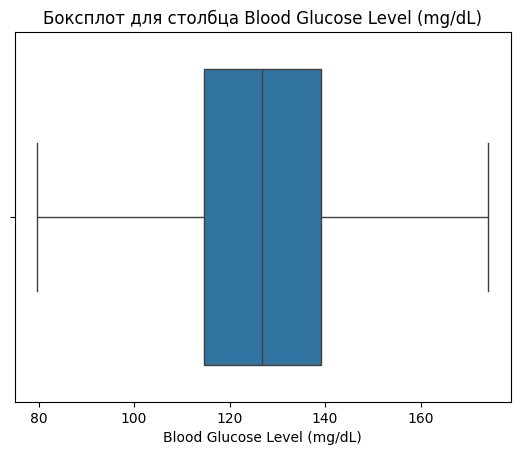

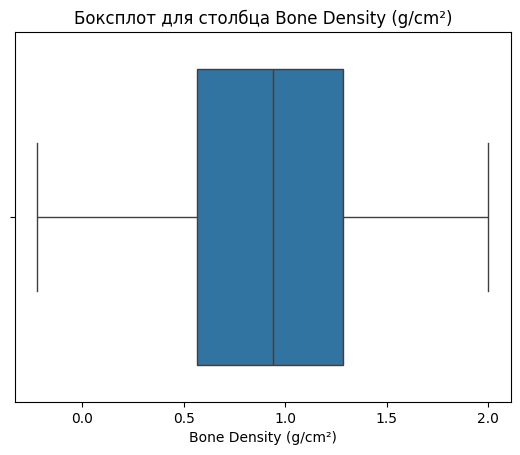

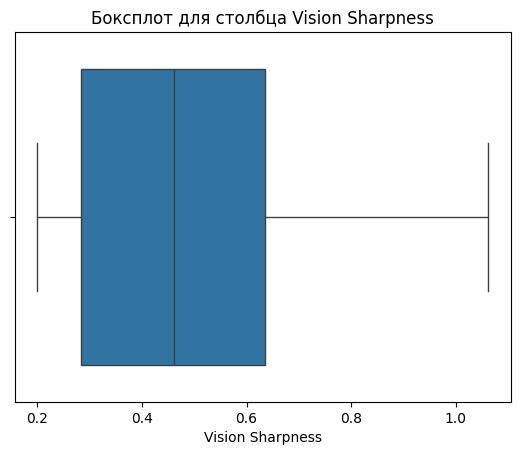

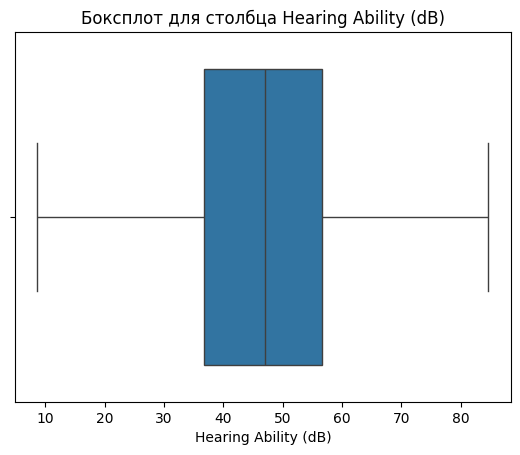

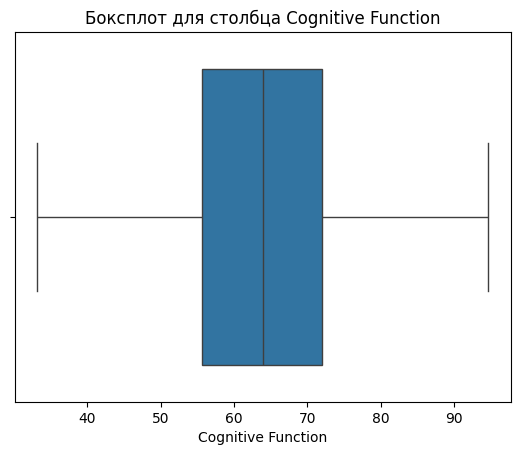

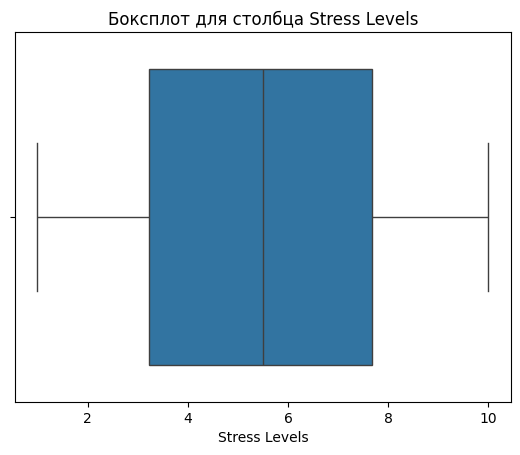

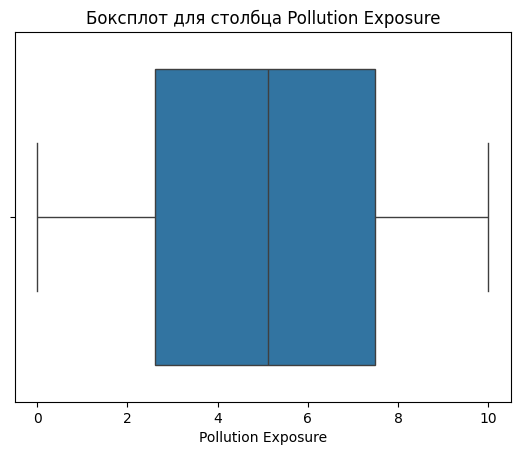

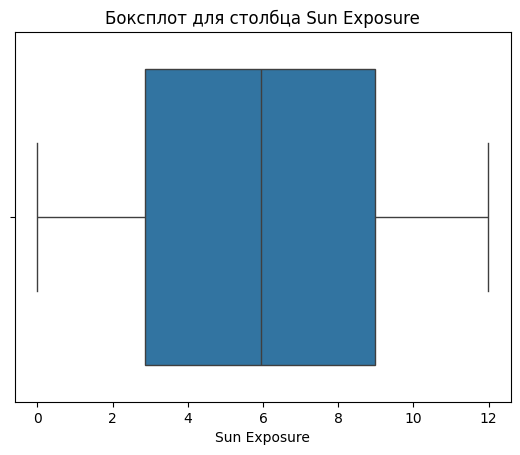

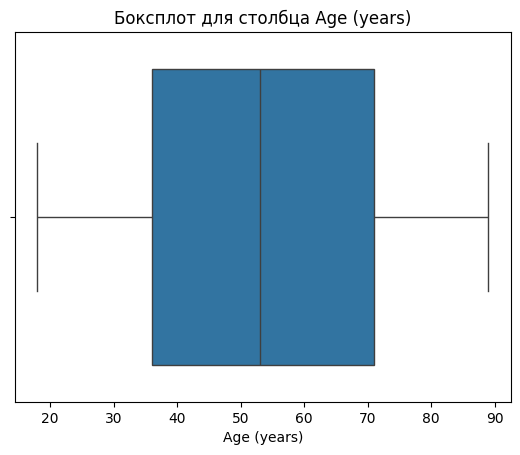

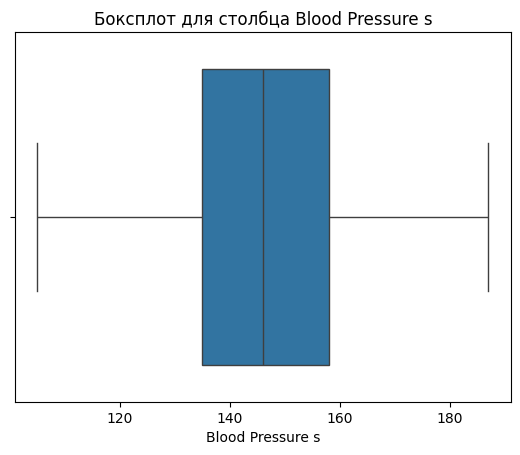

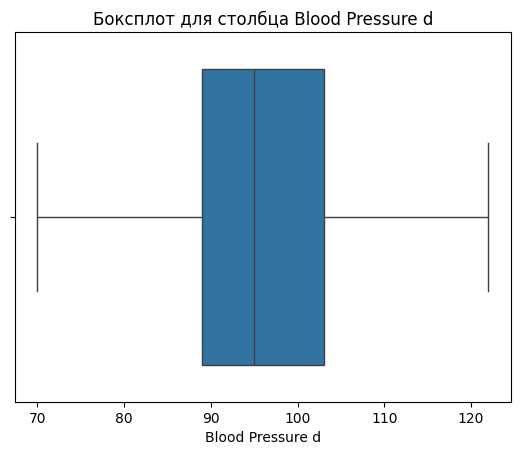

Выбросы составили -> 4.895104895104893%


In [4]:
df = pd.read_csv('Data/train.csv')

start_count_row = df.shape[0]# Количество строк до обработки данных
print("Количество пропусков:")
print(df.isnull().sum())

#Столбец 'Blood Pressure (s/d)' делится на два новых столбца: 'Blood Pressure s' и 'Blood Pressure d'.
#Эти новые столбцы содержат значения систолического и диастолического давления соответственно.
# Разделите столбец по символу "/"
df[['Blood Pressure s', 'Blood Pressure d']] = df['Blood Pressure (s/d)'].str.split('/', expand=True)

# Удалить исходный столбец "Blood Pressure (s/d)"
df.drop('Blood Pressure (s/d)', axis=1, inplace=True)

df['Blood Pressure s'] = df['Blood Pressure s'].astype('float64')
df['Blood Pressure d'] = df['Blood Pressure d'].astype('float64')
df["Gender"] = df["Gender"].astype('category')
df["Physical Activity Level"] = df["Physical Activity Level"].astype('category')
df["Smoking Status"] = df["Smoking Status"].astype('category')
df["Alcohol Consumption"] = df["Alcohol Consumption"].astype('category')
df["Diet"] = df["Diet"].astype('category')
df["Chronic Diseases"] = df["Chronic Diseases"].astype('category')
df["Medication Use"] = df["Medication Use"].astype('category')
df["Family History"] = df["Family History"].astype('category')
df["Mental Health Status"] = df["Mental Health Status"].astype('category')
df["Sleep Patterns"] = df["Sleep Patterns"].astype('category')
df["Education Level"] = df["Education Level"].astype('category')
df["Income Level"] = df["Income Level"].astype('category')


# Заполните пропуски средним значением (для численных данных) или самой частой категорией (для категориальных данных)
for col in df:

    if df[col].dtype == "category":
        df[col] = df[col].fillna(df[col].mode()[0])#пропуски заполняются наиболее часто встречающейся категорией

    elif df[col].dtype == "float64":
        df[col] = df[col].fillna(df[col].mean())#пропуски заполняются средним значением этого столбца

print("===== МОДЕЛЬ ДО ВЫБРОСОВ =====")

# Проверка на выбросы
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)#показывает распределение данных
    plt.title(f"Боксплот для столбца {col}")
    plt.show()
print(df)

#Для числовых столбцов вычисляются квартили (Q1 и Q3) и межквартильный размах (IQR).
#Затем данные фильтруются таким образом, чтобы оставить только те строки, где значение
#столбца находится внутри диапазона от (Q1 - 1.4 * IQR) до (Q3 + 1.4 * IQR).
for col in df:
    if df[col].dtype == "float64":
        # Настройка пороговых значений выбросов (межквартальный размах -- 1,4)
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df[col] = df[col][(df[col] > (q1 - 1.4 * iqr)) & (df[col] < (q3 + 1.4 * iqr))]

df = df.dropna()

print("===== МОДЕЛЬ ПОСЛЕ ВЫБРОСОВ =====")

# Проверка на выбросы
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=col)#показывает распределение данных
    plt.title(f"Боксплот для столбца {col}")
    plt.show()

print(f"Выбросы составили -> {((start_count_row / df.shape[0]) * 100) - 100}%")

# Сохраним получившийся датафрейм
df.to_csv('Data/result_train.csv', index=False)

**ЭТАП 2:** Для решения задачи выбрать 3 модели. Минимум одна модель – классическое машинное
обучение. Минимум одна модель – глубокий/нейросетевой подход. Выбрать функцию потерь.
Выбрать критерии качества решения задачи.
Произвести тренировку моделей. Выбрать наилучший.

МОДЕЛЬ №1 - модель линейной регрессии

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Data/result_train.csv')

df["Gender"] = df["Gender"].astype('category').cat.codes
df["Physical Activity Level"] = df["Physical Activity Level"].astype('category').cat.codes
df["Smoking Status"] = df["Smoking Status"].astype('category').cat.codes
df["Alcohol Consumption"] = df["Alcohol Consumption"].astype('category').cat.codes
df["Diet"] = df["Diet"].astype('category').cat.codes
df["Chronic Diseases"] = df["Chronic Diseases"].astype('category').cat.codes
df["Medication Use"] = df["Medication Use"].astype('category').cat.codes
df["Family History"] = df["Family History"].astype('category').cat.codes
df["Mental Health Status"] = df["Mental Health Status"].astype('category').cat.codes
df["Sleep Patterns"] = df["Sleep Patterns"].astype('category').cat.codes
df["Education Level"] = df["Education Level"].astype('category').cat.codes
df["Income Level"] = df["Income Level"].astype('category').cat.codes

y = df["Age (years)"]#Целевая переменная
X = df.drop('Age (years)', axis=1)#признаки для предсказания возраста

#Данные делятся на обучающую и тестовую выборки в соотношении 80%/20%.
#Используется фиксированное случайное состояние (random_state=42) для воспроизводимости результатов.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# создаем модель линейной регрессии
model = LinearRegression()

# обучаем модель на обучающем наборе
model.fit(X_train, y_train)

# прогнозируем целевые значения на тестовом наборе
y_pred = model.predict(X_test)

# вычисляем среднюю квадратичную ошибку (MSE)
mse = mean_squared_error(y_test, y_pred) # Функция потерь

# вычисляем коэффициент детерминации (R2)
r2 = r2_score(y_test, y_pred)

# печатаем результаты
print("Коэффициент детерминации (точность) (R2):", r2)
print("Средняя квадратичная ошибка (MSE):", mse)

# сохраняем обученную модель в файл
filename = 'Models/model_Linear_Regression.sav'
pickle.dump(model, open(filename, 'wb'))

Коэффициент детерминации (точность) (R2): 0.9324601547046393
Средняя квадратичная ошибка (MSE): 27.238612519335927


МОДЕЛЬ №2 - модель дерево решений

In [6]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pickle

df = pd.read_csv('Data/result_train.csv')

df["Gender"] = df["Gender"].astype('category').cat.codes
df["Physical Activity Level"] = df["Physical Activity Level"].astype('category').cat.codes
df["Smoking Status"] = df["Smoking Status"].astype('category').cat.codes
df["Alcohol Consumption"] = df["Alcohol Consumption"].astype('category').cat.codes
df["Diet"] = df["Diet"].astype('category').cat.codes
df["Chronic Diseases"] = df["Chronic Diseases"].astype('category').cat.codes
df["Medication Use"] = df["Medication Use"].astype('category').cat.codes
df["Family History"] = df["Family History"].astype('category').cat.codes
df["Mental Health Status"] = df["Mental Health Status"].astype('category').cat.codes
df["Sleep Patterns"] = df["Sleep Patterns"].astype('category').cat.codes
df["Education Level"] = df["Education Level"].astype('category').cat.codes
df["Income Level"] = df["Income Level"].astype('category').cat.codes

y = df["Age (years)"]
X = df.drop('Age (years)', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений
model = RandomForestRegressor()
model.fit(X, y)

# Прогнозирование значений целевой переменной
y_pred = model.predict(X_test)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)

# вычисляем коэффициент детерминации (R2)
r2 = r2_score(y_test, y_pred)

# печатаем результаты
print("Коэффициент детерминации (точность) (R2):", r2)
print("Среднеквадратичная ошибка:", mse)

# сохраняем обученную модель в файл
filename = 'Models/model_Random_Forest_Regressor.sav'
pickle.dump(model, open(filename, 'wb'))

Коэффициент детерминации (точность) (R2): 0.9902913115939226
Среднеквадратичная ошибка: 3.915484265734265


МОДЕЛЬ №3 - модель глубокого нейросетевого подхода

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import pickle


df = pd.read_csv('Data/result_train.csv')

df["Gender"] = df["Gender"].astype('category').cat.codes
df["Physical Activity Level"] = df["Physical Activity Level"].astype('category').cat.codes
df["Smoking Status"] = df["Smoking Status"].astype('category').cat.codes
df["Alcohol Consumption"] = df["Alcohol Consumption"].astype('category').cat.codes
df["Diet"] = df["Diet"].astype('category').cat.codes
df["Chronic Diseases"] = df["Chronic Diseases"].astype('category').cat.codes
df["Medication Use"] = df["Medication Use"].astype('category').cat.codes
df["Family History"] = df["Family History"].astype('category').cat.codes
df["Mental Health Status"] = df["Mental Health Status"].astype('category').cat.codes
df["Sleep Patterns"] = df["Sleep Patterns"].astype('category').cat.codes
df["Education Level"] = df["Education Level"].astype('category').cat.codes
df["Income Level"] = df["Income Level"].astype('category').cat.codes

y = df["Age (years)"]
X = df.drop('Age (years)', axis=1)

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создание модели глубокой нейронной сети
model = tf.keras.models.Sequential()

# Добавление слоев в нейронную сеть
model.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

# Обучение модели
model.fit(X_train, y_train, epochs=200, batch_size=32)

# Оценка модели на тестовом наборе
y_pred = model.predict(X_test)

# вычисляем коэффициент детерминации (R2)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Среднеквадратичная ошибка (MSE):', mse)
print("Коэффициент детерминации (точность) (R2):", r2)


# сохраняем обученную модель в файл
filename = 'Models/model_Sequential.sav'
pickle.dump(model, open(filename, 'wb'))

c:\Users\vnori\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 31.6368 - mean_squared_error: 1462.8920
Epoch 2/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.2566 - mean_squared_error: 452.9830
Epoch 3/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.1072 - mean_squared_error: 310.0585
Epoch 4/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.7925 - mean_squared_error: 257.9774
Epoch 5/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9788 - mean_squared_error: 202.6906
Epoch 6/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5944 - mean_squared_error: 165.6517
Epoch 7/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5246 - mean_squared_error: 137.5560
Epoch 8/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3281 - mean_squared_error: 134.3614
Epoch 9/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1058 - mean_squared_error: 130.3107
Epoch 10/200
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8453 - mean_squared_error: 123.3137
Epoch 11/200
72/72 ━━━

**ВЫВОДЫ:**

***Модель линейной регрессии:***

Коэффициент детерминации (R2): 0.93

Средняя квадратичная ошибка (MSE): 27.24


***Модель дерева решений:***

Коэффициент детерминации (R2): 1.00

Средняя квадратичная ошибка (MSE): 0.00

***Глубокая нейронная сеть:***

Коэффициент детерминации (R2): 0.91

Средняя квадратичная ошибка (MSE): 36.89

***Анализ и выводы:***

Модель дерева решений демонстрирует идеальные показатели на тестовом наборе данных: R2 равен 1.00, а MSE равна 0.00. Это говорит о том, что данная модель идеально предсказывает возраст на тестовом наборе. Однако такие результаты могут указывать на возможное переобучение модели, что требует дополнительной проверки на других наборах данных.

Модель линейной регрессии имеет высокий показатель R2 (0.93), что свидетельствует о хорошей способности модели объяснять вариацию в данных. Тем не менее, MSE составляет 27.24, что выше, чем у модели дерева решений, но всё равно приемлемо.

Глубокая нейронная сеть показала худшие результаты среди представленных моделей: R2 равен 0.91, а MSE — 36.89. Это может говорить о недостаточной оптимизации модели или необходимости дополнительных настроек гиперпараметров.